In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv') #veri setini okuma
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.drop(["Unnamed: 32","id"],inplace=True,axis=1) #Gereksiz veriyi silme

In [4]:
data.rename(columns={"diagnosis":"Target"},inplace=True) #Gereksiz veriyi silme

In [5]:
data.head()

,Target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Target sütunu için label encoder yani kategorik bir değişkeni nümerik bir değişkene çevirme işlemi uyguladık.**

In [6]:
Target = "Target"
label_encoder = LabelEncoder()
data[Target] = label_encoder.fit_transform(data["Target"])
data

,Target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


**Target değişkeni için ver dağılımı kontrolu yaparak her değişkende kaç kişi var diye baktık**

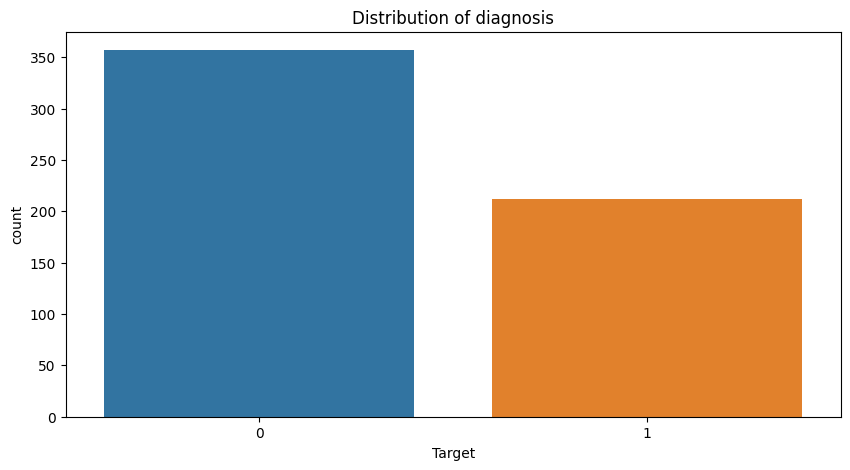

In [7]:
plt.figure(figsize=(10, 5))
sns.countplot(x = data['Target'])
plt.title('Distribution of diagnosis')
plt.show()

In [8]:
print(data.Target.value_counts())

Target
0    357
1    212
Name: count, dtype: int64


In [9]:
print(len(data))

569


In [10]:
print(data.head())

   Target  radius_mean  texture_mean  perimeter_mean  area_mean  \
0       1        17.99         10.38          122.80     1001.0   
1       1        20.57         17.77          132.90     1326.0   
2       1        19.69         21.25          130.00     1203.0   
3       1        11.42         20.38           77.58      386.1   
4       1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           18

In [11]:
print("Data Shape",data.shape)

Data Shape (569, 31)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Target                   569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [13]:
describe = data.describe()
describe

,Target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Keşifsel Veri Analizi:** 

Önce değişkenlerin birbiri ile olan ilişkisini görselleştirdik.

Text(0.5, 1.0, 'Correlation Between Features')

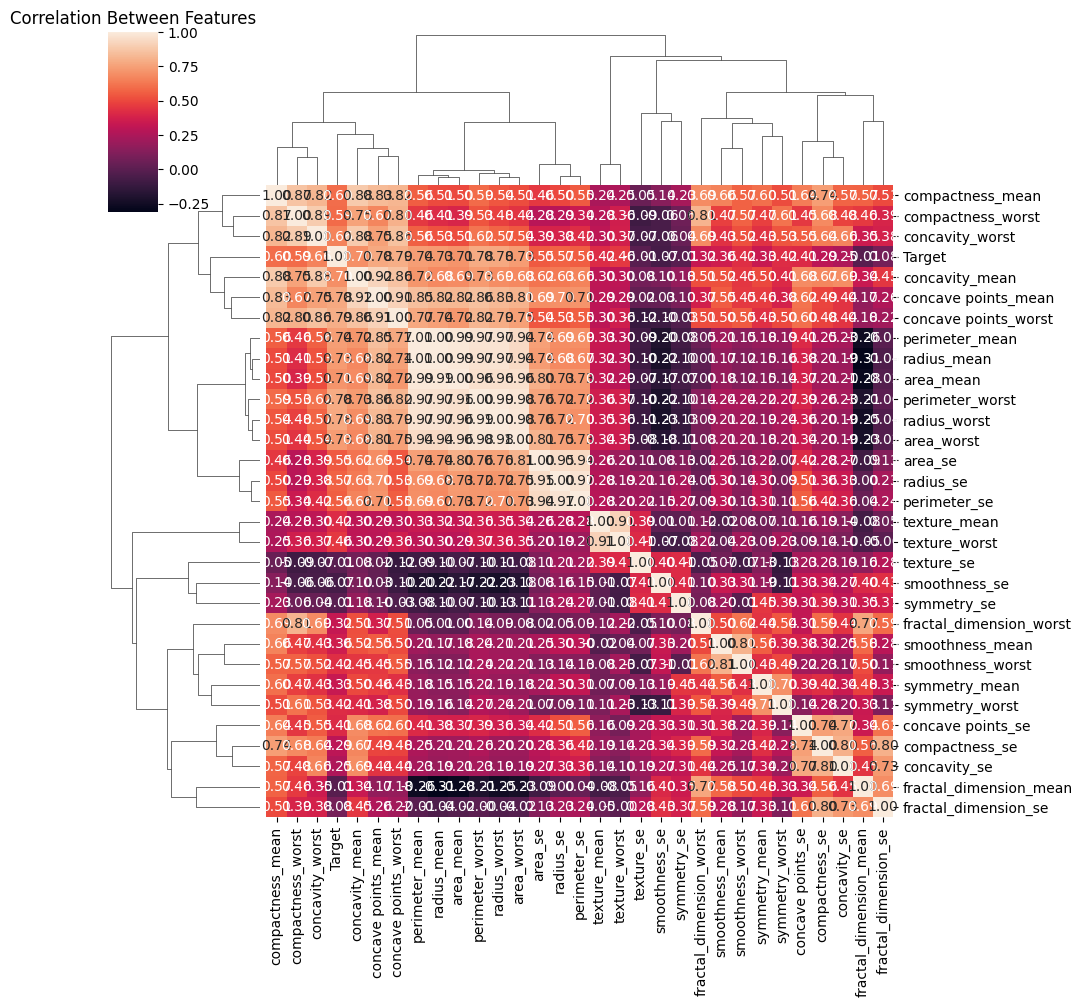

In [14]:
corr_matrix = data.corr()
sns.clustermap(corr_matrix,annot=True,fmt=".2f")
plt.title("Correlation Between Features")

Text(0.5, 1.0, 'Correlation Between Features W Corr Threshold 0.75')

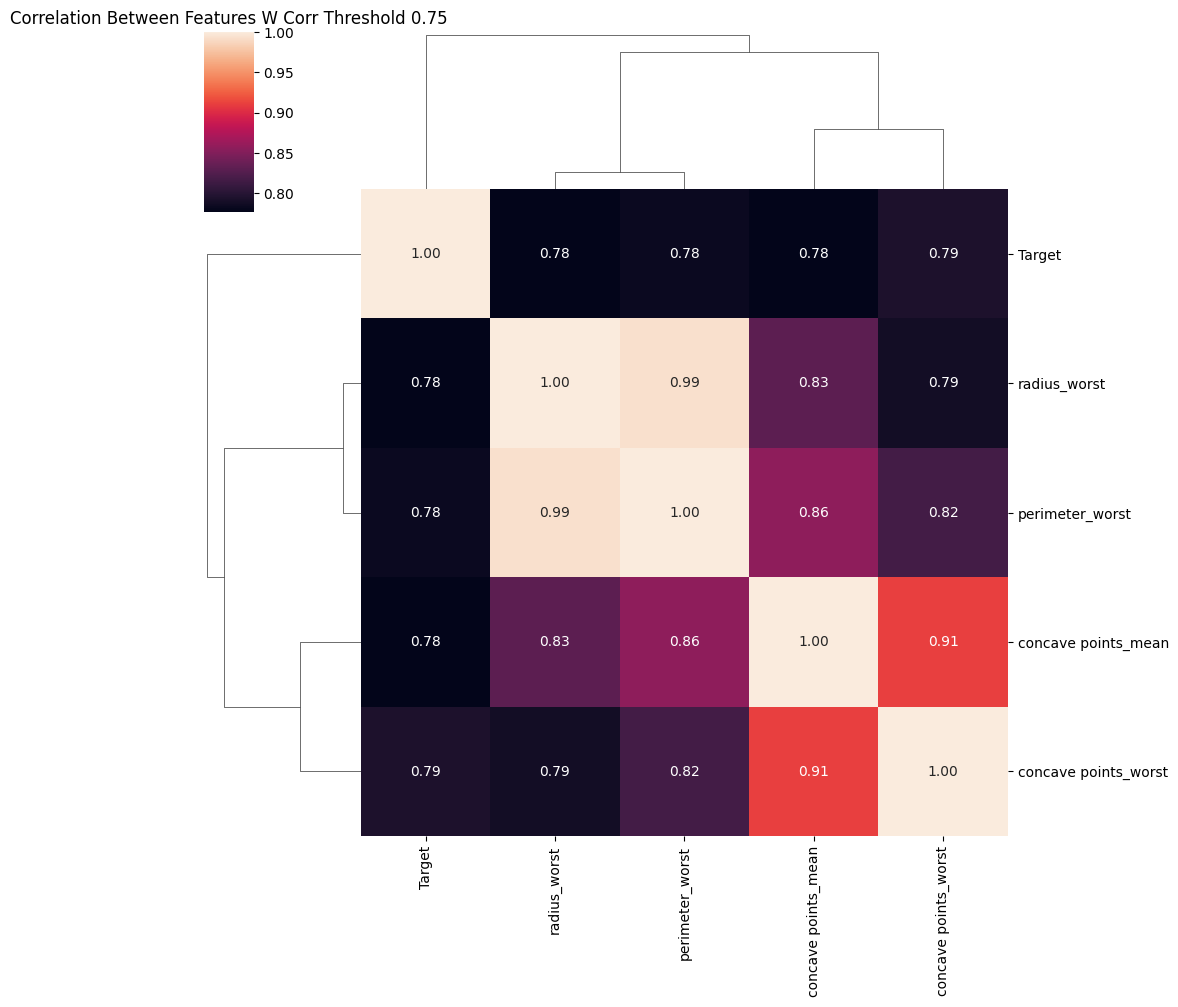

In [15]:
thresold = 0.75
filtre = np.abs(corr_matrix["Target"]) > thresold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(),annot=True,fmt=".2f")
plt.title("Correlation Between Features W Corr Threshold 0.75")

There some correlated features

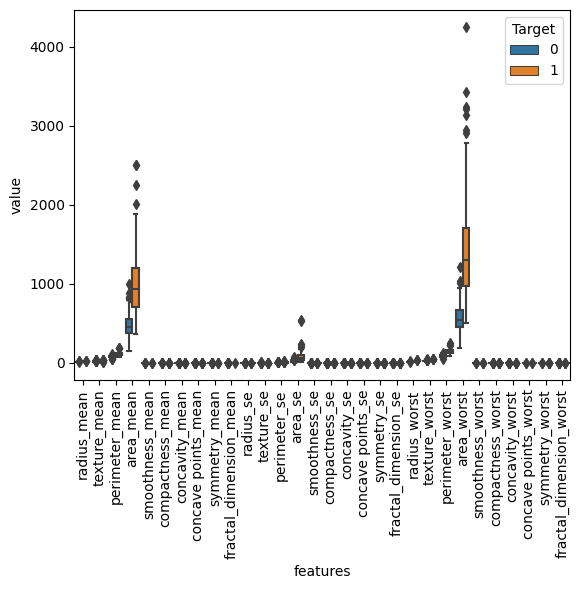

In [16]:
data_melted = pd.melt(data,id_vars="Target",var_name="features",value_name="value")
plt.figure()
sns.boxplot(x="features",y="value",hue="Target",data=data_melted)
plt.xticks(rotation=90)
plt.show()

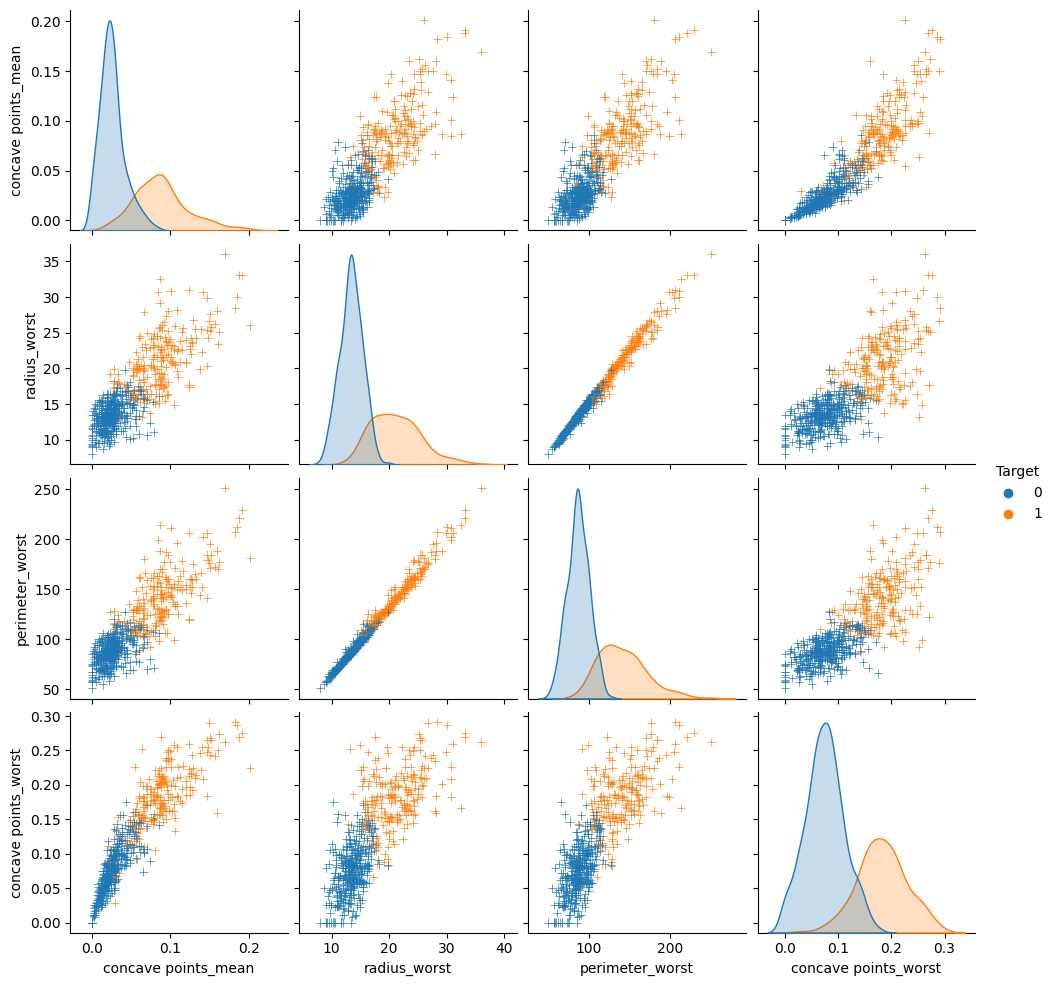

In [17]:
sns.pairplot(data[corr_features],diag_kind="kde",markers="+",hue="Target")
plt.show()

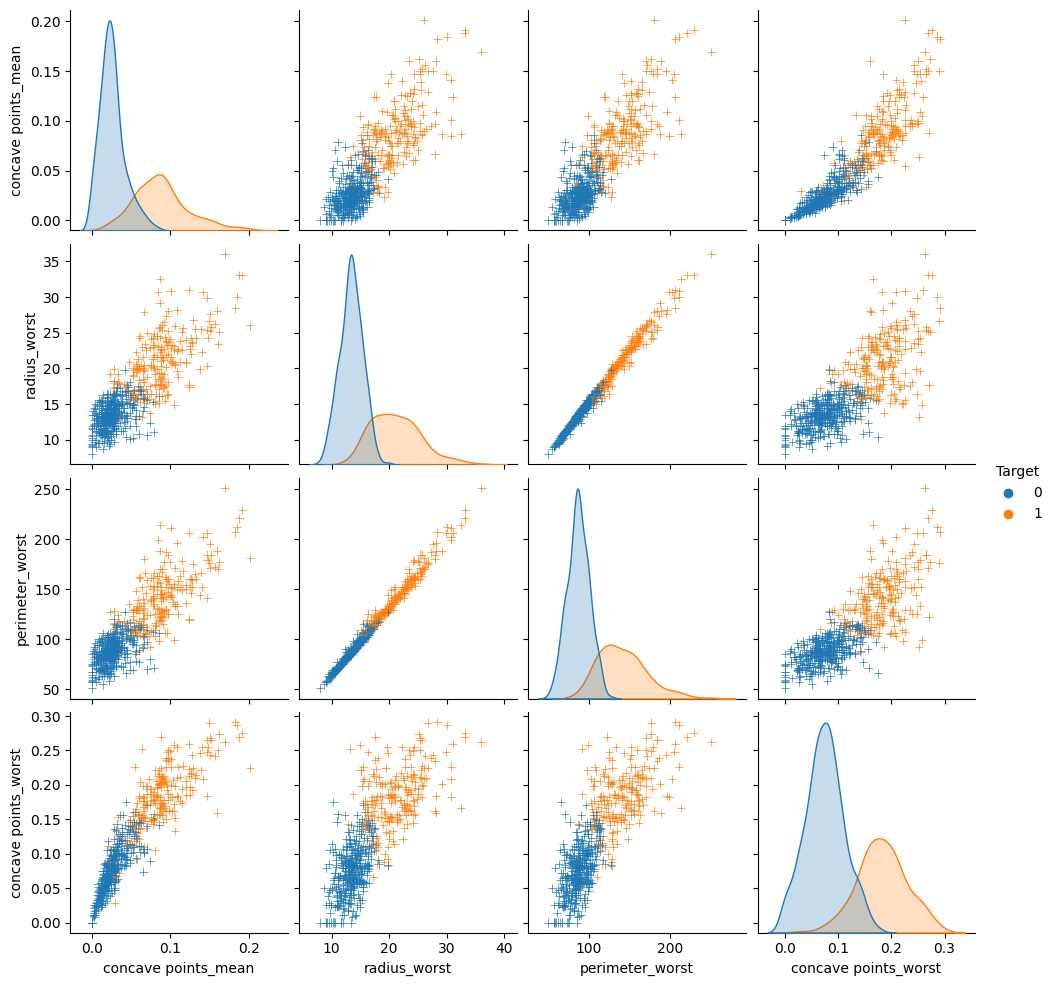

In [18]:
sns.pairplot(data[corr_features],diag_kind="kde",markers="+",hue="Target")
plt.show()

In [19]:
y=data.Target
x = data.drop(["Target"],axis=1)
columns = x.columns.tolist()

In [20]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)
X_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score 

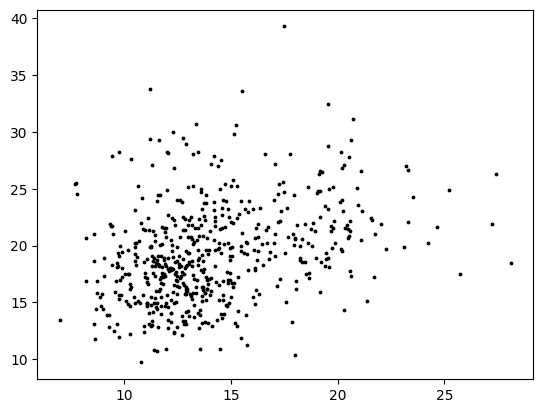

In [21]:
plt.figure()
plt.scatter(x.iloc[:,0],x.iloc[:,1],color="k",s=3,label="Data Point")

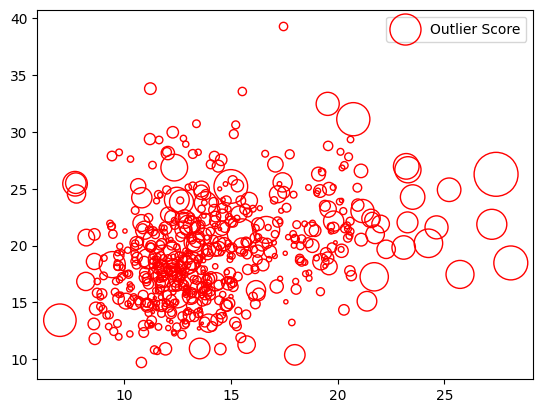

In [22]:
radius = (X_score.max() - X_score)/(X_score.max() - X_score.min())
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0],x.iloc[:,1], s=1000*radius, edgecolors = "r", facecolors = "none", label = "Outlier Score")
plt.legend()
plt.show()

Drop Outlier

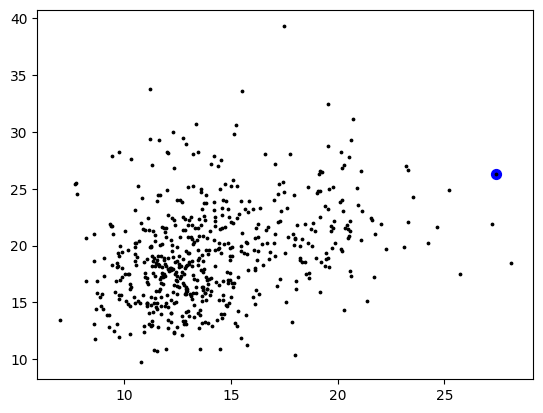

In [23]:
threshold = -2.5
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()
plt.figure()
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color = "blue",s=50,label="Outlier")
plt.scatter(x.iloc[:,0],x.iloc[:,1],color="k",s=3,label="Data Points")

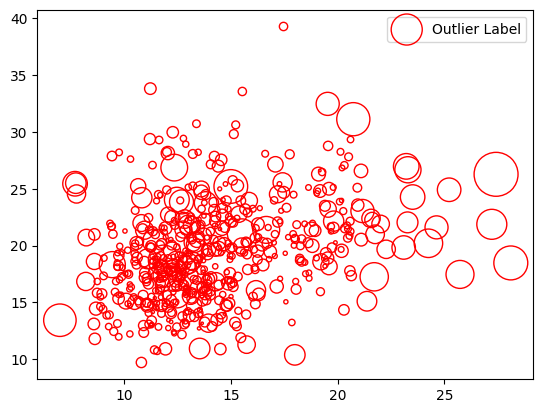

In [24]:
radius = (X_score.max()- X_score) / (X_score.max()-X_score.min())
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0],x.iloc[:,1],s=1000*radius, edgecolors = "r",facecolors = "none",label="Outlier Label")
plt.legend()
plt.show()

In [25]:
x = x.drop(outlier_index) #Outlier olan değişkenleri verimizden sildik
y = y.drop(outlier_index).values

In [26]:
test_size=0.3
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=test_size,random_state = 42)

In [27]:
scaler = StandardScaler() #Train ve test olarak ayırdığımız veri setimizi standartlaştırma işlemi uyguladık.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train_df = pd.DataFrame(X_train,columns = columns)
X_train_df_describe = X_train_df.describe()
X_train_df["Target"] = Y_train

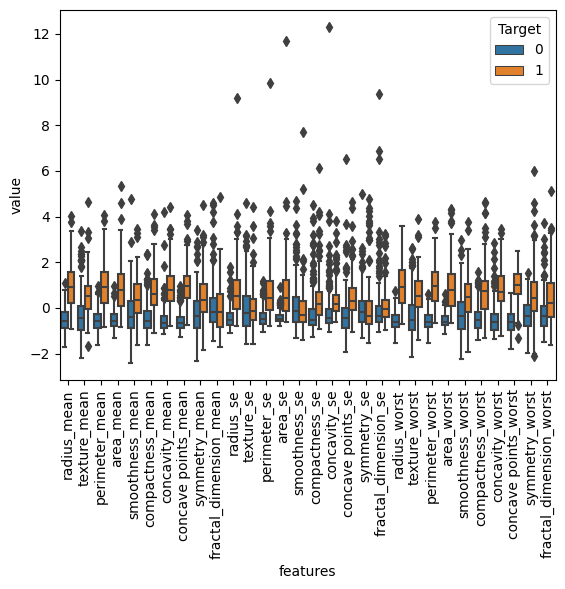

In [29]:
data_melted = pd.melt(X_train_df,id_vars ="Target",var_name = "features",value_name ="value")
plt.figure()
sns.boxplot(x="features",y="value",hue="Target",data=data_melted)
plt.xticks(rotation=90)
plt.show()

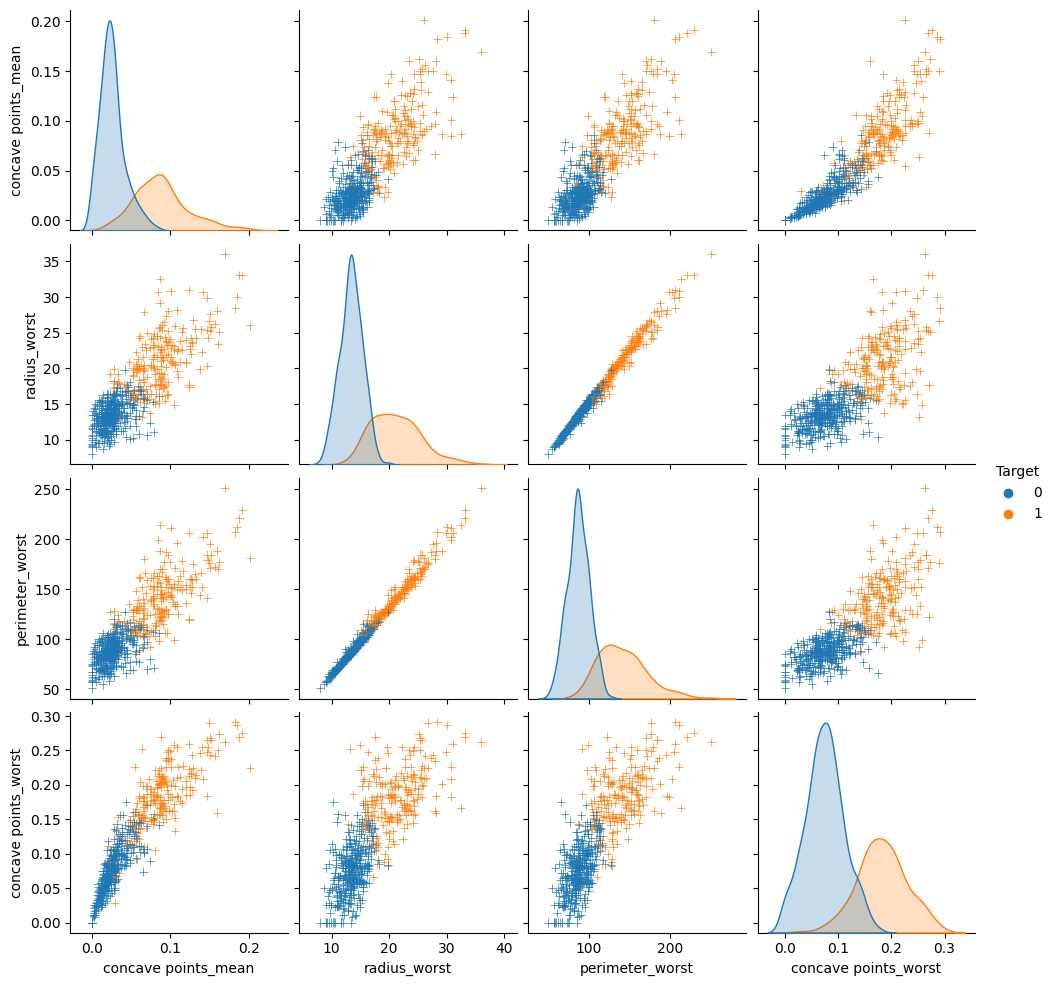

In [30]:
sns.pairplot(data[corr_features],diag_kind="kde",markers="+",hue="Target")
plt.show()

In [31]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
score = knn.score(X_test,Y_test)
print("Score:",score)
print("CM:",cm)
print("Basic KNN Acc:",acc)


Score: 0.9532163742690059
CM: [[108   1]
 [  7  55]]
Basic KNN Acc: 0.9532163742690059


In [32]:
def KNN_Best_Params(x_train,x_test,y_train,y_test):
    k_range = list(range(1,31))
    weight_options = ["uniform","distance"]
    print()
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn,param_grid,cv=10,scoring="accuracy")
    grid.fit(x_train,y_train)
    print("Best Training Score: {} with parameters: {}".format(grid.best_score_,grid.best_params_))
    print()
    knn =KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train,y_train)

In [33]:
y_pred_test = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [34]:
cm_test = confusion_matrix(Y_test,y_pred_test)
cm_train = confusion_matrix(Y_train,y_pred_train)

In [35]:
acc_test = accuracy_score(Y_test,y_pred_test)
acc_train = accuracy_score(Y_train,y_pred_train)
print("Test Score:{}, Train Score{}".format(acc_test,acc_train))

Test Score:0.9532163742690059, Train Score0.9697732997481109


In [36]:
print("CM Test:",cm_test)
print("CM Train:",cm_train)

CM Test: [[108   1]
 [  7  55]]
CM Train: [[248   0]
 [ 12 137]]


In [37]:
grid = KNN_Best_Params(X_train,X_test,Y_train,Y_test)


Best Training Score: 0.9670512820512821 with parameters: {'n_neighbors': 4, 'weights': 'uniform'}



Text(0.5, 1.0, 'PCA: p1 ve p2')

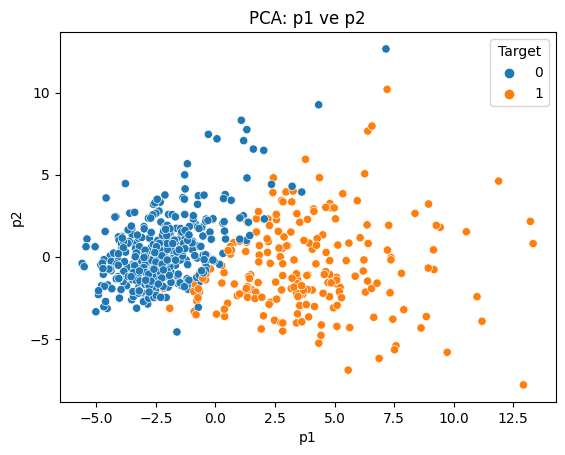

In [38]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca = PCA(n_components = 2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca,columns =["p1","p2"])
pca_data["Target"] = y
sns.scatterplot(x="p1",y="p2",hue="Target",data=pca_data)
plt.title("PCA: p1 ve p2")

In [39]:
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca,y,test_size=test_size,random_state=42)
grid_pca = KNN_Best_Params(X_train_pca,X_test_pca,Y_train_pca,Y_test_pca)


Best Training Score: 0.9419230769230769 with parameters: {'n_neighbors': 9, 'weights': 'uniform'}



In [40]:
cmap_light = ListedColormap(["orange","cornflowerblue"])
cmap_bold = ListedColormap(["darkorange","darkblue"])
h=0.05
X= X_reduced_pca
x_min, x_max, = X[:,0].min()-1,X[:,0].max()+1
y_min, y_max, = X[:,1].min()-1,X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z = grid_pca.predict(np.c_[xx.ravel(),yy.ravel()])
Z =Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,Z, cmap=cmap_light)

AttributeError: 'NoneType' object has no attribute 'predict'

AttributeError: 'NoneType' object has no attribute 'best_estimator_'

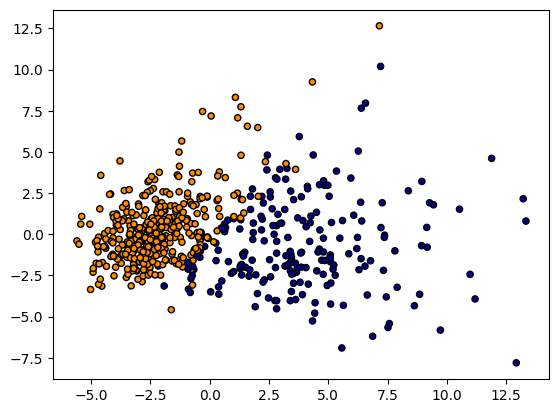

In [41]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))
plt.show()

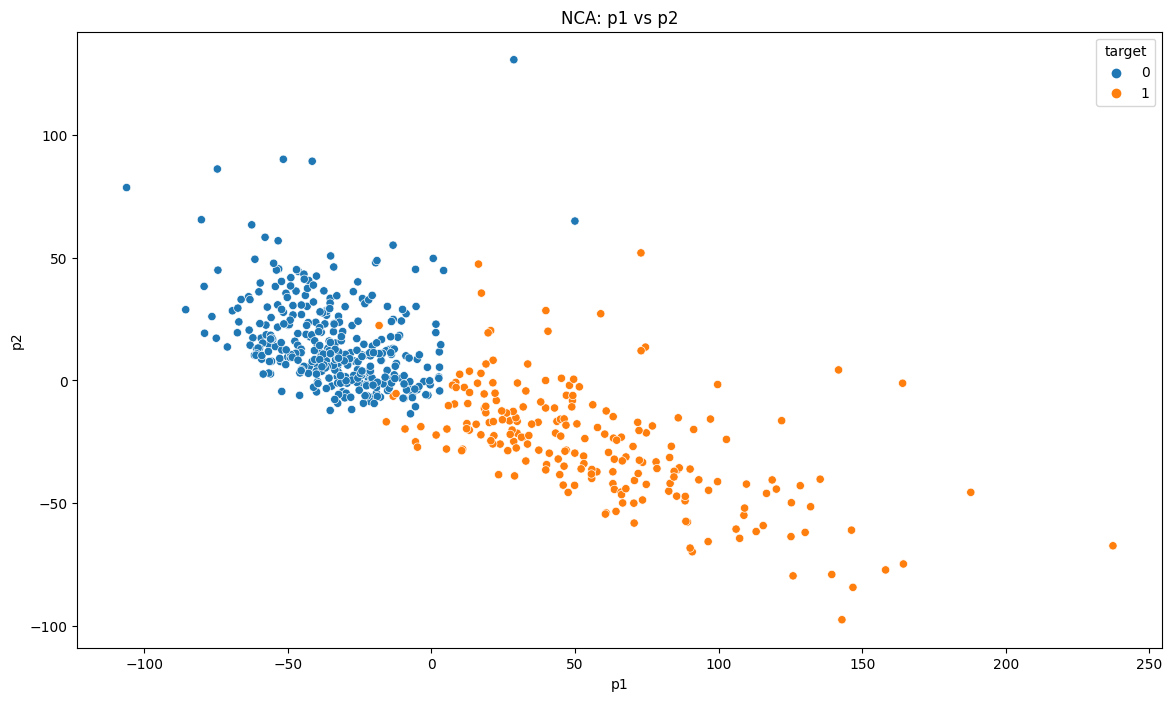

In [42]:
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)
nca.fit(x_scaled, y)
X_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(X_reduced_nca, columns = ["p1","p2"])
nca_data["target"] = y
plt.figure(figsize = (14,8))
sns.scatterplot(x = "p1", y= "p2", hue = "target", data = nca_data )
plt.title("NCA: p1 vs p2")
plt.show()